In [163]:
%matplotlib inline

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib
from datetime import datetime
import re
from sklearn.linear_model import LinearRegression
from mpl_toolkits.basemap import Basemap

In [8]:
# read in data
data = pd.read_csv('3-Airplane_Crashes_Since_1908.txt',sep=',')

In [9]:
data.columns.values

array(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'], dtype=object)

In [10]:
data.shape

(5268, 13)

In [48]:
# look at casualties divided by civil and military aircrafts
military = data[["Military" in str(x) for x in data["Operator"]]]
civil = data[["Military" not in str(x) for x in data["Operator"]]]

In [54]:
# casualty rates disregarding people on the ground
military_casualty_rate = military["Fatalities"]/military["Aboard"]
civil_casualty_rate = civil["Fatalities"]/civil["Aboard"]

In [55]:
print np.mean(military_casualty_rate)
print np.mean(civil_casualty_rate)

0.933982544575
0.817702454149


In [83]:
# convert the Dates column into a Python datetime object for plotting and analysis
dates = [datetime.strptime(x, "%m/%d/%Y") for x in military["Date"]]
dates_civil = [datetime.strptime(x, "%m/%d/%Y") for x in civil["Date"]]

(0.0, 1.1)

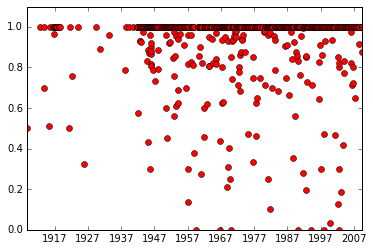

In [78]:
# scatter plot of military casualties rate by date
plt.plot(dates, military_casualty_rate, 'ro')
plt.ylim([0.0, 1.1])

<Container object of 781 artists>

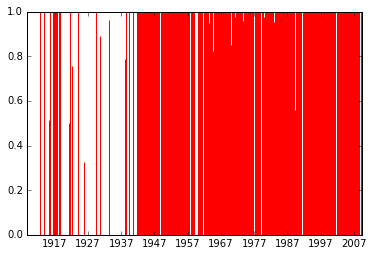

In [82]:
# bar plot of military casualties rate by date
plt.bar(dates,military_casualty_rate, color = 'red', edgecolor = 'red')

(0.0, 1.1)

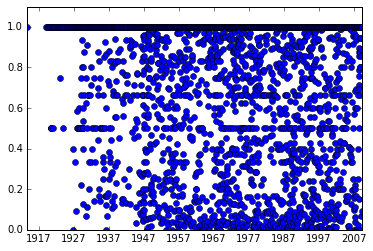

In [85]:
# scatter plot of civil casualties rate by date
plt.plot(dates_civil, civil_casualty_rate, 'bo')
plt.ylim([0.0, 1.1])

In [132]:
# read in list of cities with lat and long
cities = pd.read_csv("cities15000small.csv", sep=";")
columns = ["ID", "Uname", "Name", "Latitude", "Longitude", "Population", "CountryCode"]
cities.columns = columns

In [182]:
# Find the location of civil disasters
location = civil["Location"].values
cities_name = cities["Name"].values
cities_lat = cities["Latitude"].values
cities_long = cities["Longitude"].values

In [183]:
latitude = []
longitude = []

for cell in range(len(location)):
    found = False
    letters_only = re.sub("[^a-zA-Z]", " ", str(location[cell]))
    words = letters_only.split()
    for word in words:
        if word in cities_name and not found:
            latitude.append(cities_lat[cell])
            longitude.append(cities_long[cell])
            found = True
    if not found:    
        latitude.append(np.nan)
        longitude.append(np.nan)

In [184]:
disaster_location = pd.DataFrame.from_items([("Latitude", latitude), ("Longitude", longitude)])

In [185]:
clean_disaster = disaster_location.dropna()
lons = [float(x) for x in clean_disaster["Longitude"].values]
lats = [float(x) for x in clean_disaster["Latitude"].values]

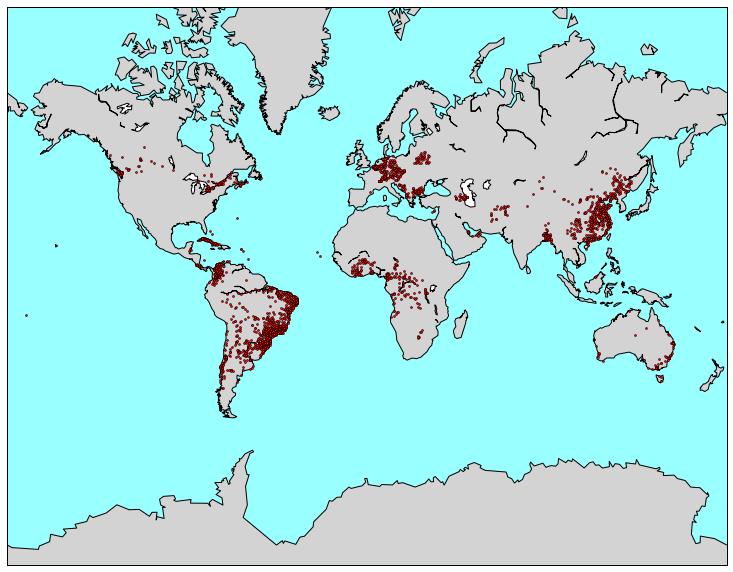

In [186]:
fig = plt.figure(figsize=(20,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
x, y = m(lons,lats)
m.drawmapboundary(fill_color='#99ffff')
m.drawcoastlines()
m.fillcontinents(color='lightgray')
m.plot(x, y,'o',markersize = 2, color='red')
plt.savefig('crashes.pdf', dpi =300)